In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU
from skimage.transform import resize

In [2]:
dirname = os.path.join(os.getcwd(), 'animales')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imágenes de", imgpath)
print("="*60)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff|webp)$", filename):
            filepath = os.path.join(root, filename)
            try:
                image = plt.imread(filepath)
                if len(image.shape) == 3:
                    images.append(image)
                    cant = cant + 1  # ✅ Cuenta SOLO si se cargó bien
            except:
                print(f"Error leyendo: {filepath}")
            
            if prevRoot != root:
                if prevRoot != '':
                    print(f"✓ Directorio completado: {prevRoot.split(os.sep)[-1]} - {cant} imágenes")
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                print(f"\n📁 Cargando directorio: {root.split(os.sep)[-1]}")
                cant = 0

dircount.append(cant)
if prevRoot != '':
    print(f"✓ Directorio completado: {prevRoot.split(os.sep)[-1]} - {cant} imágenes")

dircount = dircount[1:]
dircount[0] = dircount[0] + 1

print("\n" + "="*60)
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio:", dircount)
print('Suma total de imágenes:', sum(dircount))
print("="*60)

Leyendo imágenes de D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\

📁 Cargando directorio: Gato
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10051.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10259.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10267.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10421.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10461.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10489.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_10507.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animal

Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13333.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_1339.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13463.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_1347.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13472.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13510.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13529.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_13586.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_1366

Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16478.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16519.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_1653.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16537.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16603.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16643.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16657.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_16659.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_166

Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3111.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3255.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3305.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3326.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_336.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3376.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3415.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_343.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_3556.jpg
Err

Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_5937.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_5956.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6116.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6226.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6230.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6274.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6308.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6345.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_6373.jpg
E

Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_953.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9535.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9678.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_973.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9831.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9867.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9955.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9956.jpg
Error leyendo: D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\animales\Gato\gato_9960.jpg
Err

In [3]:
labels = []
indice = 0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice = indice + 1
print("Cantidad de etiquetas creadas:", len(labels))

Cantidad de etiquetas creadas: 45978


In [4]:
animales = []
indice = 0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice, name[len(name)-1])
    animales.append(name[len(name)-1])
    indice = indice + 1

0 Gato
1 Hormiga
2 Mariquita
3 Perro
4 Tortuga


In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total de clases:', nClasses)
print('Clases:', classes)
print('Nombres de animales:', animales)

Total de clases: 5
Clases: [0 1 2 3 4]
Nombres de animales: ['Gato', 'Hormiga', 'Mariquita', 'Perro', 'Tortuga']


In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)
print('Datos de entrenamiento:', train_X.shape, train_Y.shape)
print('Datos de prueba:', test_X.shape, test_Y.shape)

Datos de entrenamiento: (36782, 32, 32, 3) (36782,)
Datos de prueba: (9196, 32, 32, 3) (9196,)


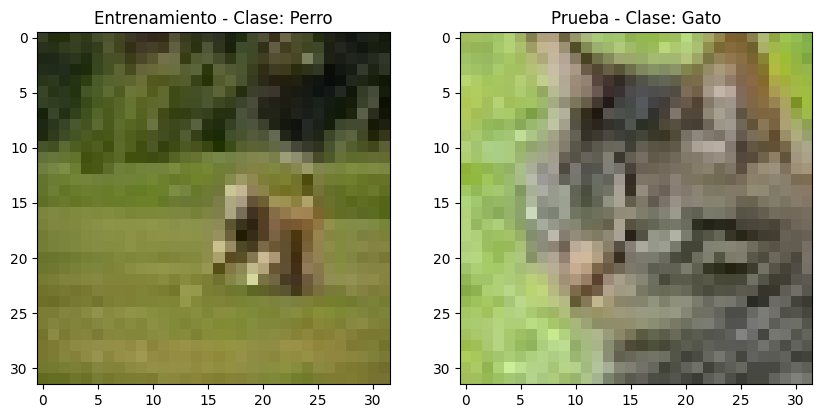

In [7]:
plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(train_X[0, :, :])
plt.title(f"Entrenamiento - Clase: {animales[train_Y[0]]}")

plt.subplot(122)
plt.imshow(test_X[0, :, :])
plt.title(f"Prueba - Clase: {animales[test_Y[0]]}")
plt.show()

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Etiqueta original:', train_Y[0])
print('Después de one-hot:', train_Y_one_hot[0])

Etiqueta original: 3
Después de one-hot: [0. 0. 0. 1. 0.]


In [10]:
train_X, valid_X, train_label, valid_label = train_test_split(
    train_X, train_Y_one_hot, test_size=0.2, random_state=13
)

In [11]:
print("Formas finales:")
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

Formas finales:
(29425, 32, 32, 3) (7357, 32, 32, 3) (29425, 5) (7357, 5)


In [12]:
INIT_LR = 1e-3
epochs = 120  # Aumentado para mejor entrenamiento
batch_size = 32

In [13]:
img_height, img_width, img_channels = train_X.shape[1], train_X.shape[2], train_X.shape[3]

# Crear modelo
animal_model = Sequential()
animal_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', 
                        input_shape=(img_height, img_width, img_channels)))
animal_model.add(LeakyReLU(alpha=0.1))
animal_model.add(MaxPooling2D((2, 2), padding='same'))
animal_model.add(Dropout(0.25))

animal_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
animal_model.add(LeakyReLU(alpha=0.1))
animal_model.add(MaxPooling2D((2, 2), padding='same'))
animal_model.add(Dropout(0.25))

animal_model.add(Flatten())
animal_model.add(Dense(128, activation='linear'))
animal_model.add(LeakyReLU(alpha=0.1))
animal_model.add(Dropout(0.5))
animal_model.add(Dense(nClasses, activation='softmax'))

In [14]:
animal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                        

In [15]:
animal_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR),
    metrics=['accuracy']
)

In [16]:
print("\n" + "="*50)
print("INICIANDO ENTRENAMIENTO")
print("="*50 + "\n")

animal_train = animal_model.fit(
    train_X, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)


INICIANDO ENTRENAMIENTO

Epoch 1/120


920/920 [==============================] - 14s 13ms/step - loss: 0.9240 - accuracy: 0.6194 - val_loss: 0.8220 - val_accuracy: 0.6942
Epoch 2/120
920/920 [==============================] - 11s 12ms/step - loss: 0.7512 - accuracy: 0.7038 - val_loss: 0.6555 - val_accuracy: 0.7460
Epoch 3/120
920/920 [==============================] - 11s 12ms/step - loss: 0.6910 - accuracy: 0.7252 - val_loss: 0.6213 - val_accuracy: 0.7654
Epoch 4/120
920/920 [==============================] - 11s 12ms/step - loss: 0.6503 - accuracy: 0.7429 - val_loss: 0.6023 - val_accuracy: 0.7680
Epoch 5/120
920/920 [==============================] - 11s 12ms/step - loss: 0.6216 - accuracy: 0.7557 - val_loss: 0.5820 - val_accuracy: 0.7744
Epoch 6/120
920/920 [==============================] - 11s 12ms/step - loss: 0.5924 - accuracy: 0.7663 - val_loss: 0.5881 - val_accuracy: 0.7697
Epoch 7/120
920/920 [==============================] - 11s 12ms/step - loss: 0.5651 - accuracy: 0.7769

920/920 [==============================] - 11s 12ms/step - loss: 0.2478 - accuracy: 0.9076 - val_loss: 0.6017 - val_accuracy: 0.8015
Epoch 109/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2407 - accuracy: 0.9076 - val_loss: 0.5698 - val_accuracy: 0.8124
Epoch 110/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2412 - accuracy: 0.9095 - val_loss: 0.5687 - val_accuracy: 0.8150
Epoch 111/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2441 - accuracy: 0.9073 - val_loss: 0.5734 - val_accuracy: 0.8136
Epoch 112/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2357 - accuracy: 0.9095 - val_loss: 0.5730 - val_accuracy: 0.8217
Epoch 113/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2405 - accuracy: 0.9102 - val_loss: 0.6027 - val_accuracy: 0.8127
Epoch 114/120
920/920 [==============================] - 11s 12ms/step - loss: 0.2386 - accuracy: 0.9137 - val_loss: 0.5999 - val_ac

In [17]:
animal_model.save("CNN_animales_V3.h5")
print("\nModelo guardado como 'CNN_animales_V3.h5'")

D:\PedroCarpetas\Tecnologico\Semestre 10\IA\Inteligencia-Artificial\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Modelo guardado como 'CNN_animales_V3.h5'


In [18]:
test_eval = animal_model.evaluate(test_X, test_Y_one_hot, verbose=1)

288/288 [==============================] - 1s 4ms/step - loss: 0.6287 - accuracy: 0.8094


In [19]:
print('\nPérdida en prueba:', test_eval[0])
print('Precisión en prueba:', test_eval[1])


Pérdida en prueba: 0.6287330389022827
Precisión en prueba: 0.8093736171722412


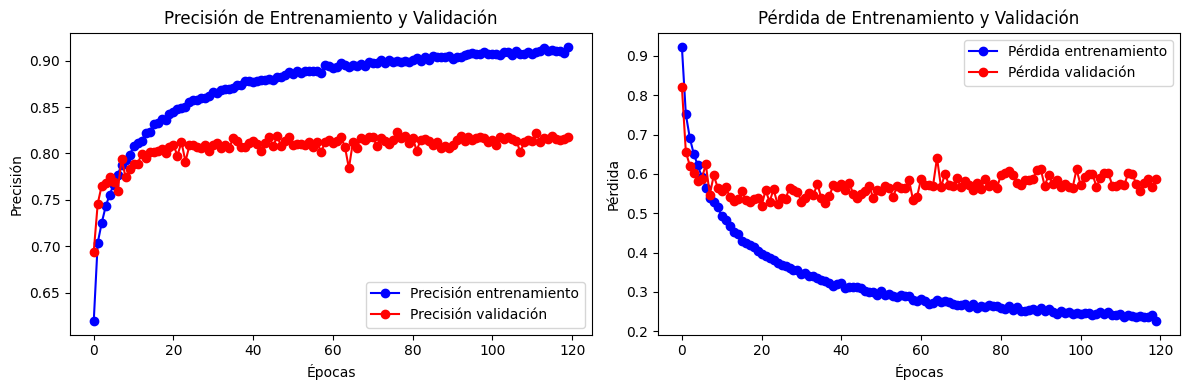

In [20]:
accuracy = animal_train.history['accuracy']
val_accuracy = animal_train.history['val_accuracy']
loss = animal_train.history['loss']
val_loss = animal_train.history['val_loss']
epochs_range = range(len(accuracy))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, 'bo-', label='Precisión entrenamiento')
plt.plot(epochs_range, val_accuracy, 'ro-', label='Precisión validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Pérdida entrenamiento')
plt.plot(epochs_range, val_loss, 'ro-', label='Pérdida validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
predicted_classes2 = animal_model.predict(test_X)
predicted_classes = np.argmax(predicted_classes2, axis=1)

288/288 [==============================] - 1s 4ms/step



Encontradas 7443 etiquetas correctas


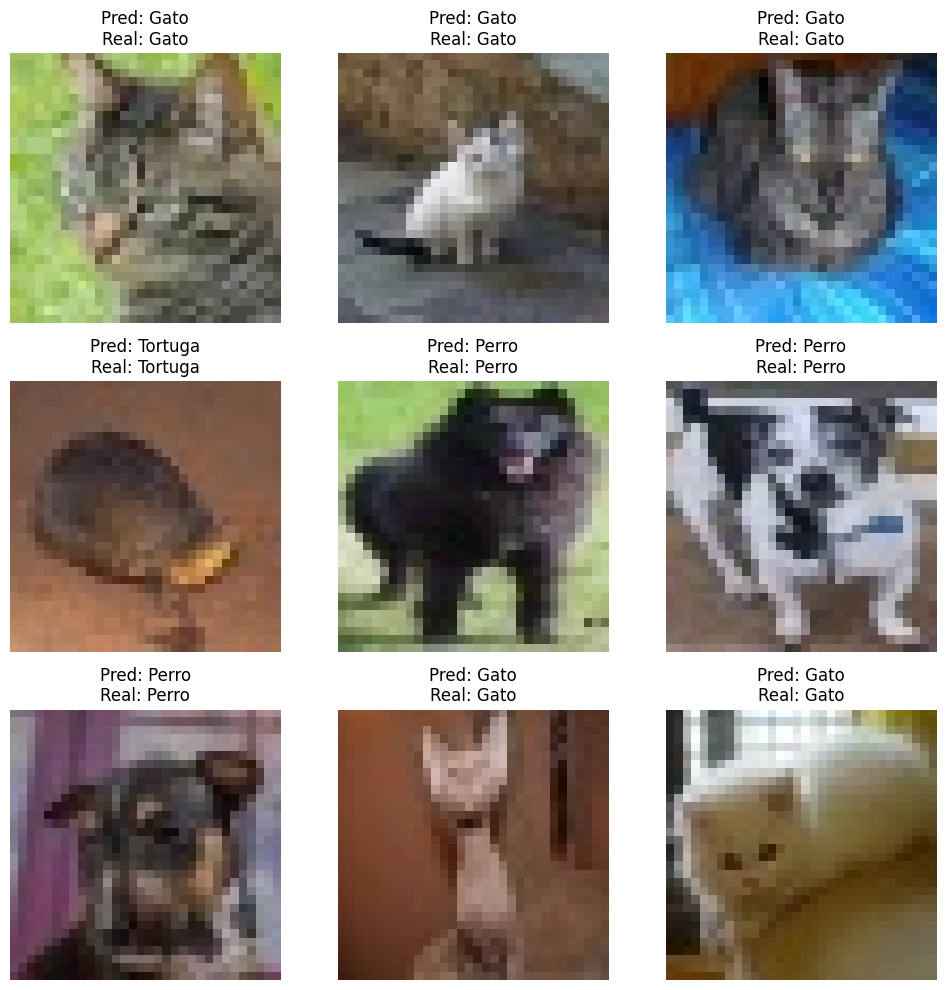

In [22]:
correct = np.where(predicted_classes == test_Y)[0]
print(f"\nEncontradas {len(correct)} etiquetas correctas")

if len(correct) > 0:
    plt.figure(figsize=(10, 10))
    for i, correct_idx in enumerate(correct[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(test_X[correct_idx])
        plt.title(f"Pred: {animales[predicted_classes[correct_idx]]}\nReal: {animales[test_Y[correct_idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Encontradas 1753 etiquetas incorrectas


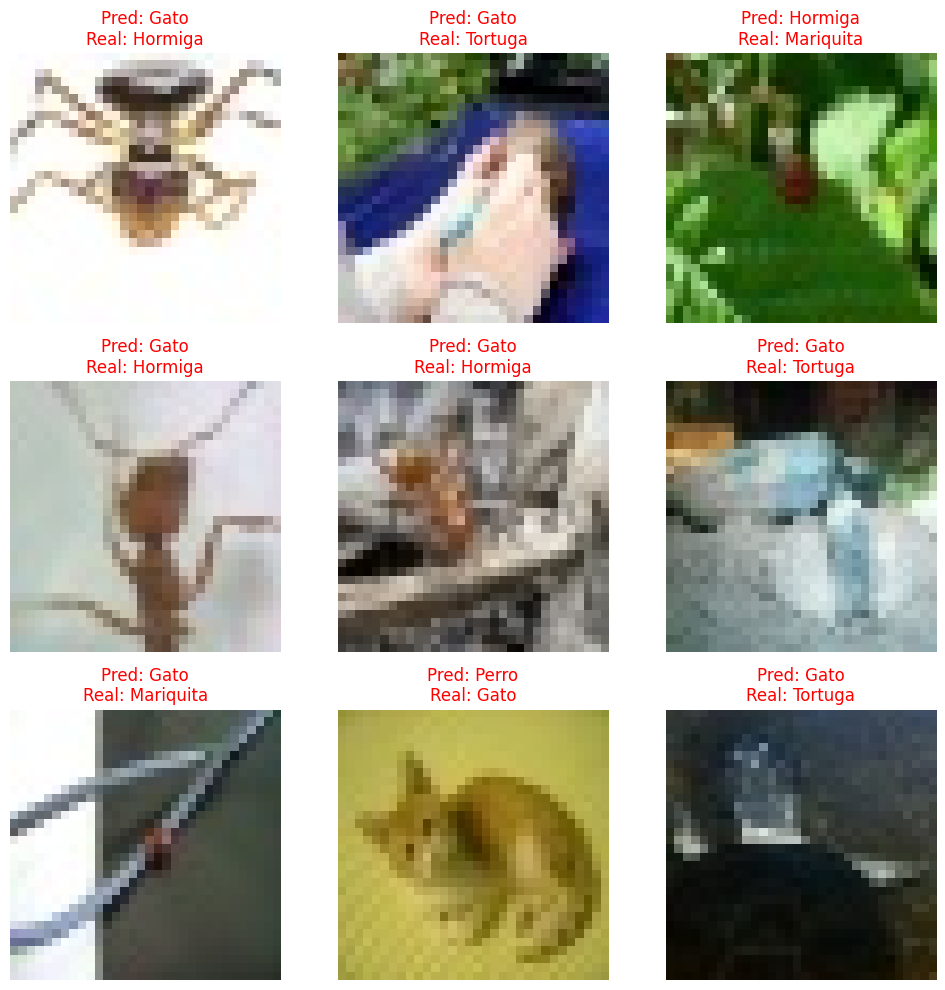

In [23]:
incorrect = np.where(predicted_classes != test_Y)[0]
print(f"\nEncontradas {len(incorrect)} etiquetas incorrectas")

if len(incorrect) > 0:
    plt.figure(figsize=(10, 10))
    for i, incorrect_idx in enumerate(incorrect[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(test_X[incorrect_idx])
        plt.title(f"Pred: {animales[predicted_classes[incorrect_idx]]}\nReal: {animales[test_Y[incorrect_idx]]}", 
                  color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [24]:
target_names = [f"{animal}" for animal in animales]
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN")
print("="*50)
print(classification_report(test_Y, predicted_classes, target_names=target_names))


REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

        Gato       0.80      0.85      0.82      3544
     Hormiga       0.51      0.29      0.37       344
   Mariquita       0.79      0.62      0.69       361
       Perro       0.84      0.87      0.85      3971
     Tortuga       0.77      0.69      0.72       976

    accuracy                           0.81      9196
   macro avg       0.74      0.66      0.69      9196
weighted avg       0.80      0.81      0.80      9196



In [25]:
print("\n" + "="*50)
print("PREDICCIÓN DE NUEVAS IMÁGENES")
print("="*50)

# CAMBIA ESTAS RUTAS a las imágenes que quieras clasificar
nuevas_imagenes = [
    '1.jpg',
    '2.jpg',
    '3.jpg',
]

images = []
filenames_validos = []

for filepath in nuevas_imagenes:
    if os.path.exists(filepath):
        try:
            image = plt.imread(filepath)
            image_resized = resize(image, (img_height, img_width), 
                                 anti_aliasing=True, clip=False, preserve_range=True)
            images.append(image_resized)
            filenames_validos.append(filepath)
        except:
            print(f"Error al leer: {filepath}")
    else:
        print(f"Archivo no encontrado: {filepath}")

if len(images) > 0:
    X_new = np.array(images, dtype=np.uint8)
    test_new = X_new.astype('float32') / 255.0
    
    predicted = animal_model.predict(test_new)
    
    for i, pred in enumerate(predicted):
        animal_pred = animales[np.argmax(pred)]
        confianza = np.max(pred) * 100
        print(f"{filenames_validos[i]} -> {animal_pred} (Confianza: {confianza:.2f}%)")
else:
    print("No se encontraron imágenes válidas para predecir")


PREDICCIÓN DE NUEVAS IMÁGENES
Archivo no encontrado: test_hormiga.jpg
Archivo no encontrado: test_gato.jpg
Archivo no encontrado: test_mariquita.jpg
No se encontraron imágenes válidas para predecir


✓ Modelo cargado exitosamente
✓ Dimensiones esperadas: 32x32x3

Cargando imágenes...
  ✓ 1.jpg
  ✓ 2.jpg
  ✓ 3.jpg
  ✓ 4.jpg
  ✓ 5.jpg

RESULTADOS DE LAS PREDICCIONES

📷 Imagen: 1.jpg
   🐾 Predicción: TORTUGA
   📊 Confianza: 99.85%

📷 Imagen: 2.jpg
   🐾 Predicción: TORTUGA
   📊 Confianza: 99.76%

📷 Imagen: 3.jpg
   🐾 Predicción: TORTUGA
   📊 Confianza: 100.00%

📷 Imagen: 4.jpg
   🐾 Predicción: TORTUGA
   📊 Confianza: 99.97%

📷 Imagen: 5.jpg
   🐾 Predicción: TORTUGA
   📊 Confianza: 82.45%



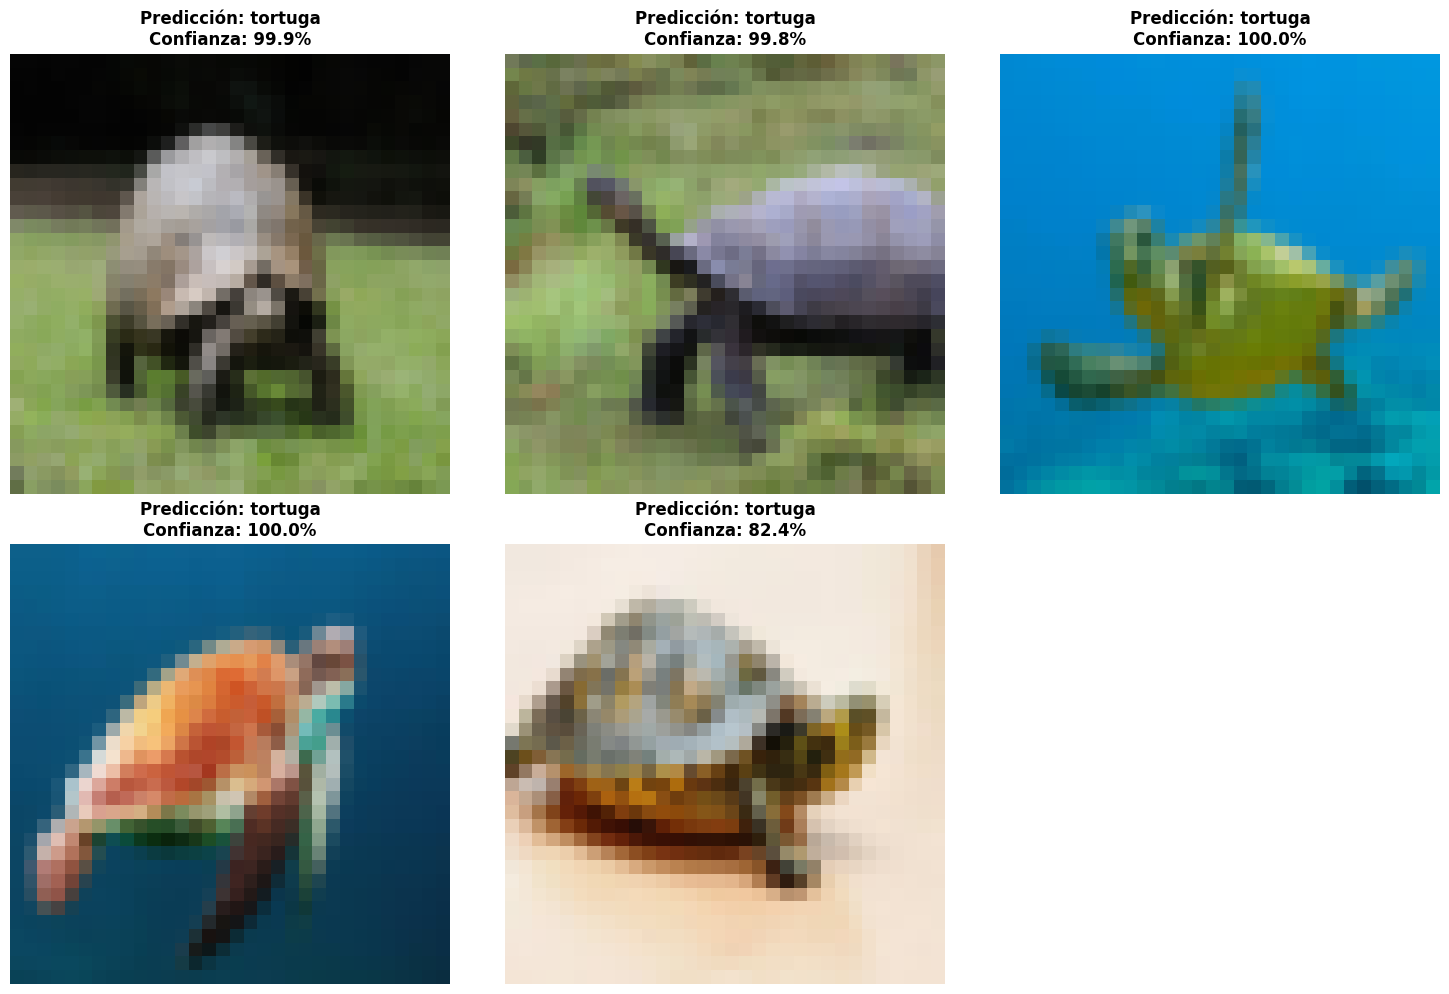

In [6]:
from keras.models import load_model
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import os

animal_model = load_model('CNN_animales_V2.h5')
print("✓ Modelo cargado exitosamente")

animales = ['gato', 'hormiga', 'mariquita', 'perro', 'tortuga']

input_shape = animal_model.layers[0].input_shape
img_height = input_shape[1]
img_width = input_shape[2]
img_channels = input_shape[3]

print(f"✓ Dimensiones esperadas: {img_height}x{img_width}x{img_channels}")

filenames = [
    '1.jpg',
    '2.jpg',
    '3.jpg',
    '4.jpg',
    '5.jpg',
]

images = []
filenames_validos = []

print("\nCargando imágenes...")
for filepath in filenames:
    if os.path.exists(filepath):
        try:
            image = plt.imread(filepath)
            image_resized = resize(
                image, 
                (img_height, img_width), 
                anti_aliasing=True, 
                clip=False, 
                preserve_range=True
            )
            images.append(image_resized)
            filenames_validos.append(filepath)
            print(f"  ✓ {filepath}")
        except Exception as e:
            print(f"  ✗ Error al leer {filepath}: {e}")
    else:
        print(f"  ✗ Archivo no encontrado: {filepath}")

if len(images) > 0:
    X = np.array(images, dtype=np.uint8)
    test_X = X.astype('float32') / 255.0
    
    print("\n" + "="*60)
    print("RESULTADOS DE LAS PREDICCIONES")
    print("="*60)
    
    predicted = animal_model.predict(test_X, verbose=0)
    
    for i, pred in enumerate(predicted):
        animal_pred = animales[np.argmax(pred)]
        confianza = np.max(pred) * 100
        
        print(f"\n📷 Imagen: {filenames_validos[i]}")
        print(f"   🐾 Predicción: {animal_pred.upper()}")
        print(f"   📊 Confianza: {confianza:.2f}%")
    
    print("\n" + "="*60)
    num_imgs = len(images)
    
    if num_imgs <= 6:
        cols = 3 if num_imgs >= 3 else num_imgs
        rows = (num_imgs + cols - 1) // cols
        
        plt.figure(figsize=(15, 5*rows))
        
        for i in range(num_imgs):
            plt.subplot(rows, cols, i+1)
            plt.imshow(images[i].astype(np.uint8))
            
            animal_pred = animales[np.argmax(predicted[i])]
            confianza = np.max(predicted[i]) * 100
            
            plt.title(f"Predicción: {animal_pred}\nConfianza: {confianza:.1f}%", 
                     fontsize=12, fontweight='bold')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("(Demasiadas imágenes para visualizar)")
        
else:
    print("\n❌ No se encontraron imágenes válidas para predecir")
    print("Verifica que las rutas de los archivos sean correctas")